# SOCIAL MEDIA TREND ANALYSIS

# Importing Libraries

Loading necessary libraries for data manipulation, text processing, visualization, and machine learning.

In [83]:
import pandas as pd
import re
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from collections import Counter
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import pandas as pd

# Loading the Dataset

Importing the dataset to be used for analysis and model building.

In [84]:
import pandas as pd

file_path = 'C:/Users/Balu0/OneDrive/Desktop/twitter_data.csv'

# Specify the encoding
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows
print(data.head())


  File Name                                              Tweet Swntiment
0     1.txt      How I feel today #legday #jelly #aching #gym   negative
1    10.txt  @ArrivaTW absolute disgrace two carriages from...  negative
2   100.txt  This is my Valentine's from 1 of my nephews. I...  positive
3  1000.txt  betterfeelingfilms: RT via Instagram: First da...   neutral
4  1001.txt         Zoe's first love #Rattled @JohnnyHarper15   positive


In [62]:
data

,File Name,Tweet,Swntiment
0,1.txt,How I feel today #legday #jelly #aching #gym,negative
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive
...,...,...,...
4864,995.txt,OMG. Well done #Eskom! 'Man dies during #LoadS...,positive
4865,996.txt,Feelin' the love in here! #ValentinesDay #caring,positive
4866,997.txt,#blue #eyes can't be #beaten,neutral
4867,998.txt,LA CHUCHA LOUUU TE CHUPO LOS OJOS..!,neutral


In [85]:
import re
def extract_hashtags(text):
    return re.findall(r"#\w+", text)

# Create a new column with extracted hashtags
data["Hashtags"] = data["Tweet"].apply(extract_hashtags)

# Display the DataFrame
print(data)

     File Name                                              Tweet Swntiment  \
0        1.txt      How I feel today #legday #jelly #aching #gym   negative   
1       10.txt  @ArrivaTW absolute disgrace two carriages from...  negative   
2      100.txt  This is my Valentine's from 1 of my nephews. I...  positive   
3     1000.txt  betterfeelingfilms: RT via Instagram: First da...   neutral   
4     1001.txt         Zoe's first love #Rattled @JohnnyHarper15   positive   
...        ...                                                ...       ...   
4864   995.txt  OMG. Well done #Eskom! 'Man dies during #LoadS...  positive   
4865   996.txt  Feelin' the love in here! #ValentinesDay #caring   positive   
4866   997.txt                      #blue #eyes can't be #beaten    neutral   
4867   998.txt              LA CHUCHA LOUUU TE CHUPO LOS OJOS..!    neutral   
4868   999.txt  #colorsplash_bw #zealous Remedios #herbales y ...  positive   

                                    Hashtags  
0   

In [64]:
data

,File Name,Tweet,Swntiment,Hashtags
0,1.txt,How I feel today #legday #jelly #aching #gym,negative,"[#legday, #jelly, #aching, #gym]"
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative,[#disgraced]
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive,[]
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral,[#powerless]
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive,[#Rattled]
...,...,...,...,...
4864,995.txt,OMG. Well done #Eskom! 'Man dies during #LoadS...,positive,"[#Eskom, #LoadShedding, #Powerless]"
4865,996.txt,Feelin' the love in here! #ValentinesDay #caring,positive,"[#ValentinesDay, #caring]"
4866,997.txt,#blue #eyes can't be #beaten,neutral,"[#blue, #eyes, #beaten]"
4867,998.txt,LA CHUCHA LOUUU TE CHUPO LOS OJOS..!,neutral,[]


In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4869 entries, 0 to 4868
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File Name  4869 non-null   object
 1   Tweet      4869 non-null   object
 2   Swntiment  4869 non-null   object
 3   Hashtags   4869 non-null   object
dtypes: object(4)
memory usage: 152.3+ KB


# Data Preprocessing

Cleaning the data, including text normalization, removal of stopwords, and handling missing values.

In [87]:
import re
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)  # Remove URLs
    text = re.sub(r"@\w+|#\w+", "", text)  # Remove mentions and hashtags
    text = re.sub(r"[^A-Za-z0-9 ]+", "", text)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

data["Cleaned_Tweet"] = data["Tweet"].apply(preprocess_text)
print(data.head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Balu0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  File Name                                              Tweet Swntiment  \
0     1.txt      How I feel today #legday #jelly #aching #gym   negative   
1    10.txt  @ArrivaTW absolute disgrace two carriages from...  negative   
2   100.txt  This is my Valentine's from 1 of my nephews. I...  positive   
3  1000.txt  betterfeelingfilms: RT via Instagram: First da...   neutral   
4  1001.txt         Zoe's first love #Rattled @JohnnyHarper15   positive   

                           Hashtags  \
0  [#legday, #jelly, #aching, #gym]   
1                      [#disgraced]   
2                                []   
3                      [#powerless]   
4                        [#Rattled]   

                                       Cleaned_Tweet  
0                                         feel today  
1  absolute disgrace two carriages bangor half wa...  
2  valentines 1 nephews elated sometimes little t...  
3  betterfeelingfilms rt via instagram first day ...  
4                                

In [88]:
data.Swntiment

0       negative
1       negative
2       positive
3        neutral
4       positive
          ...   
4864    positive
4865    positive
4866     neutral
4867     neutral
4868    positive
Name: Swntiment, Length: 4869, dtype: object

# Sentiment Distribution Bar Graph

This bar graph visually represents sentiment categories with 
distinct colors and displays 
percentage values on top of each bar for a quick overview of sentiment proportions.

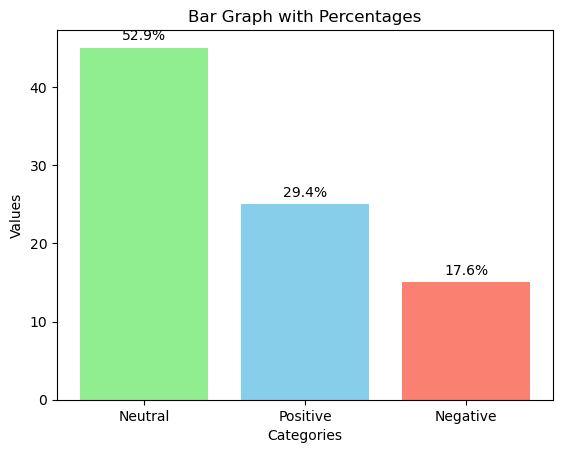

In [89]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Neutral', 'Positive', 'Negative']
values = [45, 25, 15]

# Calculate percentages
total = sum(values)
percentages = [(v / total) * 100 for v in values]

# Define different colors for each bar
colors = ['lightgreen', 'skyblue', 'salmon']

# Plot the bar graph with different colors
plt.bar(categories, values, color=colors)

# Add percentages on top of each bar
for i, v in enumerate(values):
    plt.text(i, v + 1, f'{percentages[i]:.1f}%', ha='center', fontsize=10)

# Labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Graph with Percentages')

# Show the graph
plt.show()

# Label Encoding for Sentiment Analysis

This section maps textual sentiment labels to numerical values using a dictionary, converting "positive," "neutral," and "negative" into 1, 0, and -1, respectively. The encoded labels facilitate the application of machine learning models on the sentiment data.

In [90]:
# Define the mapping
label_mapping = {"positive": 1, "neutral": 0, "negative": -1}

# Convert labels
Swntiment_encoded = [label_mapping[label] for label in data.Swntiment]

print("Swntiment labels:", Swntiment_encoded)

Swntiment labels: [-1, -1, 1, 0, 1, 1, -1, -1, 0, -1, -1, -1, 1, -1, -1, 0, 0, -1, -1, -1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, -1, 0, 1, 0, -1, 0, 0, 1, 1, 1, -1, 1, -1, 1, 0, 1, 1, 1, -1, 1, 1, -1, 0, 1, 1, 1, 1, 1, 1, 0, -1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, -1, 0, -1, -1, 1, -1, 1, 1, -1, -1, 0, 1, 0, -1, -1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, -1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, -1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, -1, 0, -1, 0, 1, 0, 1, -1, 1, 1, 0, -1, 0, 0, -1, -1, 0, 1, -1, 0, 0, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, -1, 0, 1, 1, 0, 1, 1, -1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, 0, -1, -1, -1, 0, -1, 1, 1, 1, 1, 1, 1, 1, -1, 0, -1, -1, 0, -1, 0, -1, -1, 0, 0, 0, 0, 0, 1, 1, 0, -1, 1, 1, 1, 1, 0, -1, -1, 1, -1, 1, -1, 0, -1, 0, -1, 1, -1, 1, 1

In [91]:
data["Swntiment_encoding"] = data["Swntiment"].map(label_mapping)


In [71]:
data

,File Name,Tweet,Swntiment,Hashtags,Cleaned_Tweet,Swntiment_encoding
0,1.txt,How I feel today #legday #jelly #aching #gym,negative,"[#legday, #jelly, #aching, #gym]",feel today,-1
1,10.txt,@ArrivaTW absolute disgrace two carriages from...,negative,[#disgraced],absolute disgrace two carriages bangor half wa...,-1
2,100.txt,This is my Valentine's from 1 of my nephews. I...,positive,[],valentines 1 nephews elated sometimes little t...,1
3,1000.txt,betterfeelingfilms: RT via Instagram: First da...,neutral,[#powerless],betterfeelingfilms rt via instagram first day ...,0
4,1001.txt,Zoe's first love #Rattled @JohnnyHarper15,positive,[#Rattled],zoes first love,1
...,...,...,...,...,...,...
4864,995.txt,OMG. Well done #Eskom! 'Man dies during #LoadS...,positive,"[#Eskom, #LoadShedding, #Powerless]",omg well done man dies,1
4865,996.txt,Feelin' the love in here! #ValentinesDay #caring,positive,"[#ValentinesDay, #caring]",feelin love,1
4866,997.txt,#blue #eyes can't be #beaten,neutral,"[#blue, #eyes, #beaten]",cant,0
4867,998.txt,LA CHUCHA LOUUU TE CHUPO LOS OJOS..!,neutral,[],la chucha louuu te chupo los ojos,0


In [92]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000)  # Keep top 5000 features
X = vectorizer.fit_transform(data['Cleaned_Tweet'])
Y = data['Swntiment_encoding']


# Splitting Data into Training and Testing Sets

The code splits data into training and testing sets, with 80% for training and 20% for testing, using a random seed for reproducibility.








In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Training a Multinomial Naive Bayes Model

The code initializes and trains a Multinomial Naive Bayes classifier on the training data (X_train, Y_train) to predict the target variable.

In [94]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, Y_train)


MultinomialNB()

# Evaluating Model Performance

The code predicts labels for the test set (X_test), calculates the accuracy, and generates a classification report to evaluate the model's performance.

In [95]:
from sklearn.metrics import classification_report, accuracy_score

Y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report:\n", classification_report(Y_test, Y_pred))


Accuracy: 0.635523613963039
Classification Report:
               precision    recall  f1-score   support

          -1       0.66      0.59      0.63       284
           0       0.60      0.63      0.61       367
           1       0.66      0.67      0.67       323

    accuracy                           0.64       974
   macro avg       0.64      0.63      0.64       974
weighted avg       0.64      0.64      0.64       974



# Predicting Sentiment of New Tweet

The code vectorizes a new tweet, predicts its sentiment using the trained model, and displays whether the sentiment is positive, negative, or neutral.

In [96]:
new_tweet = ["i am happy"]
new_tweet_vectorized = vectorizer.transform(new_tweet)
new_prediction = model.predict(new_tweet_vectorized)

# Display predicted sentiment
#print(f"Predicted Sentiment:
if new_prediction == 1:
    print('Positive')
elif new_prediction == -1:
    print('Negative')
else:
    print('Neutral')

Positive
